In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

print("Path to dataset files:", path)

c:\Users\Trisha Chakraborty\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Trisha Chakraborty\.cache\kagglehub\datasets\alexteboul\diabetes-health-indicators-dataset\versions\1


In [4]:
file_path = r"C:\Users\Trisha Chakraborty\.cache\kagglehub\datasets\alexteboul\diabetes-health-indicators-dataset\versions\1\diabetes_012_health_indicators_BRFSS2015.csv"

In [5]:
# Load the dataset
df = pd.read_csv(file_path)

In [6]:
df.head

<bound method NDFrame.head of         Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcar

In [7]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

<Figure size 2000x1500 with 0 Axes>

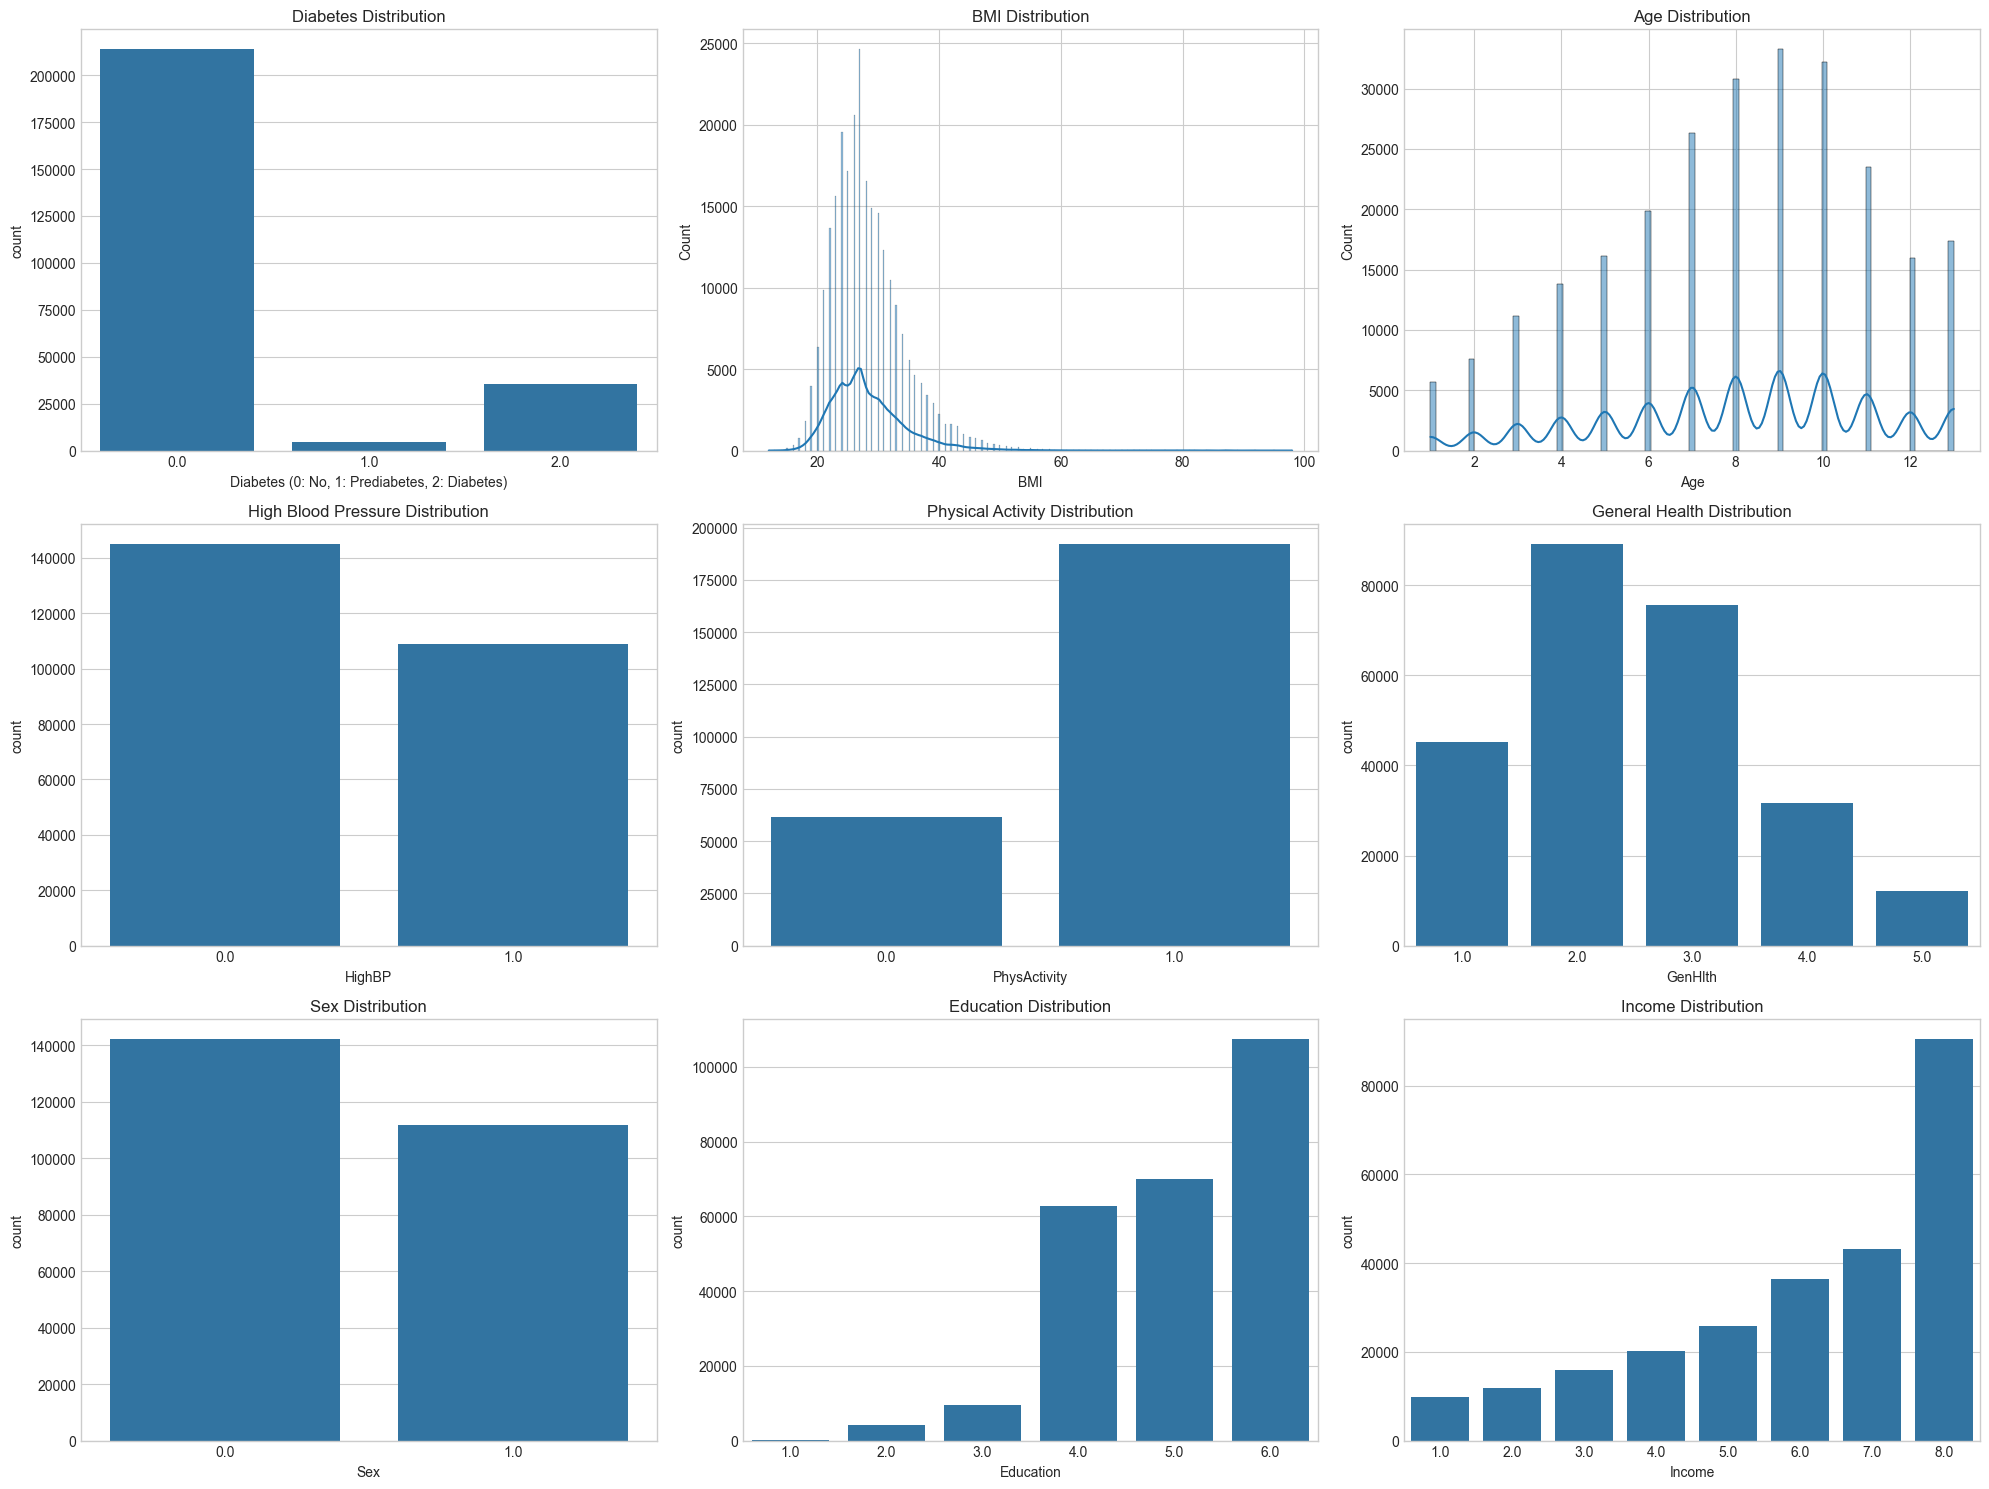

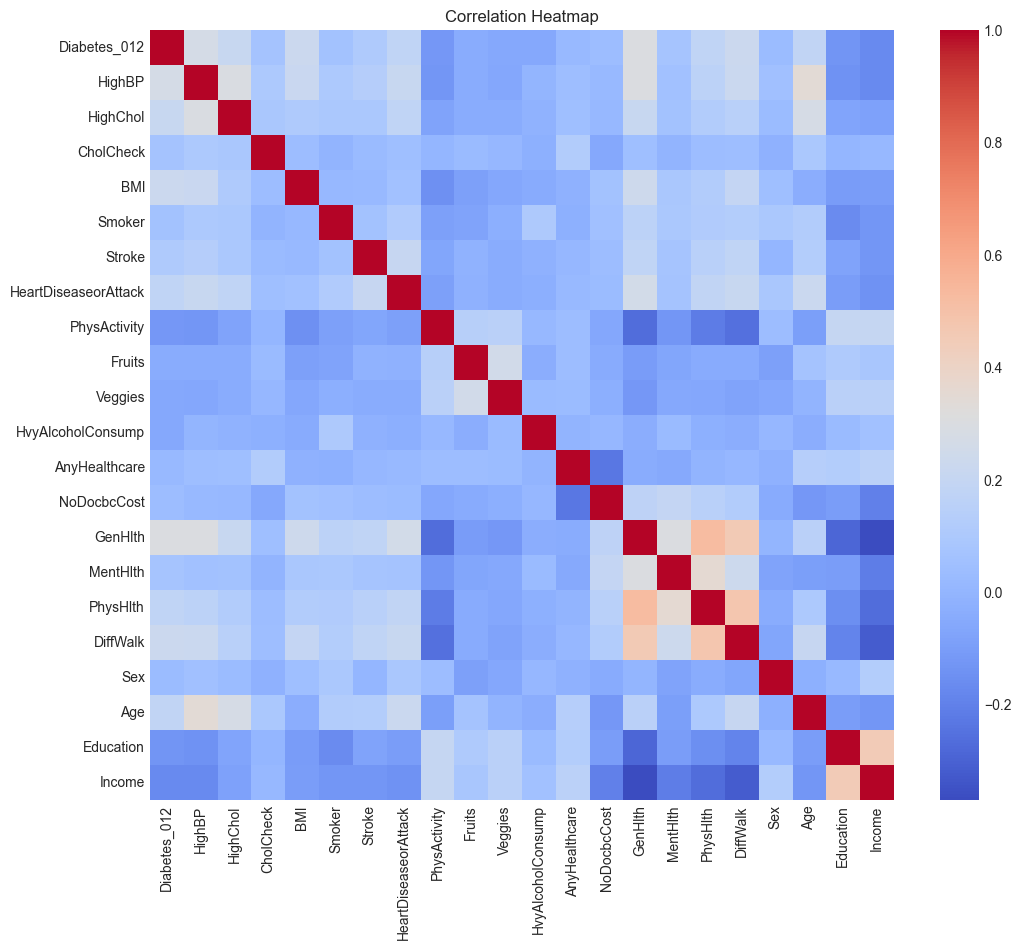

In [8]:
# Set up the plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(20, 15))

# Create subplots for different visualizations
fig, axs = plt.subplots(3, 3, figsize=(20, 15))

# 1. Diabetes distribution
sns.countplot(x='Diabetes_012', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Diabetes Distribution')
axs[0, 0].set_xlabel('Diabetes (0: No, 1: Prediabetes, 2: Diabetes)')

# 2. BMI distribution
sns.histplot(df['BMI'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('BMI Distribution')

# 3. Age distribution
sns.histplot(df['Age'], kde=True, ax=axs[0, 2])
axs[0, 2].set_title('Age Distribution')

# 4. High Blood Pressure distribution
sns.countplot(x='HighBP', data=df, ax=axs[1, 0])
axs[1, 0].set_title('High Blood Pressure Distribution')

# 5. Physical Activity distribution
sns.countplot(x='PhysActivity', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Physical Activity Distribution')

# 6. General Health distribution
sns.countplot(x='GenHlth', data=df, ax=axs[1, 2])
axs[1, 2].set_title('General Health Distribution')

# 7. Sex distribution
sns.countplot(x='Sex', data=df, ax=axs[2, 0])
axs[2, 0].set_title('Sex Distribution')

# 8. Education distribution
sns.countplot(x='Education', data=df, ax=axs[2, 1])
axs[2, 1].set_title('Education Distribution')

# 9. Income distribution
sns.countplot(x='Income', data=df, ax=axs[2, 2])
axs[2, 2].set_title('Income Distribution')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [40]:
df = df.drop(['AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Education', 'Income'], axis=1)

KeyError: "['AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Education', 'Income'] not found in axis"

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  Sex                   253680 non-null  float64
 13  Age                   253680 non-null  float64
dtypes: float64(14)
memory usage: 27.1 MB


In [42]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
Sex                     0
Age                     0
dtype: int64

In [43]:
# Separate features and target variable
y = df['Diabetes_012']
X = df.drop('Diabetes_012', axis=1)

In [44]:
cols = X.columns
index = X.index

In [45]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

In [50]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
X_train.shape

(202944, 13)

In [53]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [54]:
import pickle

# Save the model
filename = 'finalized_model.sav'
pickle.dump(log_reg, open(filename, 'wb'))



In [55]:
loaded_model = pickle.load(open(filename, 'rb'))

In [56]:
y_pred = log_reg.predict(X_test)

In [57]:
# Function to predict diabetes for a single person
def predict_diabetes(person_data):
    person_data_scaled = scaler.transform([person_data])
    prediction = loaded_model.predict(person_data_scaled)
    return "Diabetes" if prediction[0] == 1 else "No Diabetes"


In [39]:
# Example usage
new_person = [1, 1, 1, 40, 1, 0, 0, 0, 0, 1, 0, 1, 0, 5, 10, 10, 0, 1, 9, 4, 3]
result = predict_diabetes(new_person)
print(f"\nPrediction for new person: {result}")

ValueError: X has 21 features, but StandardScaler is expecting 13 features as input.

In [20]:
accuracy_score(y_train, log_reg.predict(X_train))

0.8443363686534217

In [21]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))

In [22]:
confusion_matrix(y_test, y_pred)

array([[41972,     0,   645],
       [  864,     0,    44],
       [ 6433,     0,   778]])

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     42617
         1.0       0.00      0.00      0.00       908
         2.0       0.53      0.11      0.18      7211

    accuracy                           0.84     50736
   macro avg       0.46      0.36      0.36     50736
weighted avg       0.79      0.84      0.79     50736



c:\Users\Trisha Chakraborty\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Trisha Chakraborty\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Trisha Chakraborty\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

In [24]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(accuracy_score(y_test, knn.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8586605171870072
0.8295096184169032
[[40667    36  1914]
 [  792     1   115]
 [ 5777    16  1418]]
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.91     42617
         1.0       0.02      0.00      0.00       908
         2.0       0.41      0.20      0.27      7211

    accuracy                           0.83     50736
   macro avg       0.43      0.38      0.39     50736
weighted avg       0.78      0.83      0.80     50736



In [25]:
import pickle

# Save the model
filename = 'finalized_model.sav'
pickle.dump(knn, open(filename, 'wb'))


In [60]:
with open('scaler2.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [26]:
loaded_model = pickle.load(open(filename, 'rb'))


In [30]:
# Function to predict diabetes for a single person
def predict_diabetes(person_data):
    person_data_scaled = scaler.transform([person_data])
    prediction = loaded_model.predict(person_data_scaled)
    return "Diabetes" if prediction[0] == 1 else "No Diabetes"


In [59]:
# Example usage
new_person = [1, 1, 1, 40, 1, 0, 0, 0, 0, 1, 0, 0, 9]
result = predict_diabetes(new_person)
print(f"\nPrediction for new person: {result}")


Prediction for new person: No Diabetes


c:\Users\Trisha Chakraborty\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, Sex, Age
new_person = [1, 1, 1, 40, 1, 0, 0, 0, 0, 1, 0, 0, 9]
